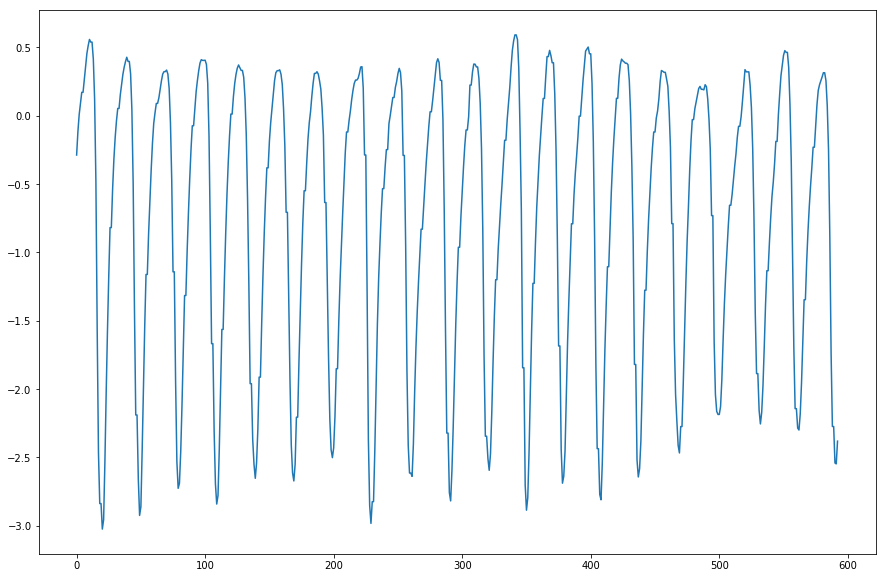

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv("data.csv")

x = df1["X"]
y = df1["Y"]

plt.rc('figure', figsize=(15, 10))

plt.plot(x,y)
plt.show()

[ -1.30490788  30.05811392   2.00789323  -0.75167174]


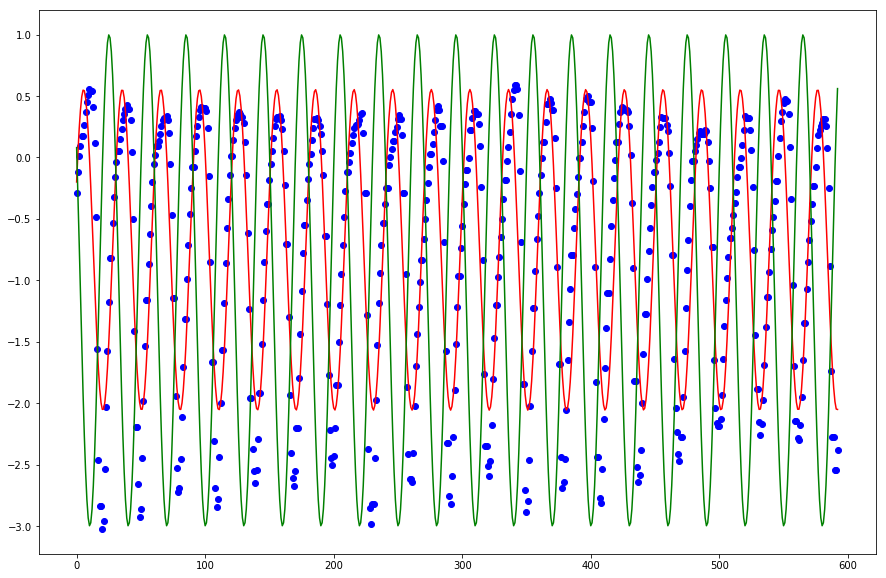

In [8]:
import numpy as np
from numpy import pi, r_
from scipy import optimize

# initial guess - it has to be quite precise
p0 = [2, 30, 1, -1.0]

fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p2,success = optimize.leastsq(errfunc, p0[:], args=(x, y))

print(p2)

# blue points - incoming data
# green line - target function from initial guess
# red line - optimized target function
plt.plot(x, y, "bo", x, fitfunc(p2, x), "r-", x, fitfunc(p0, x), "g-") 

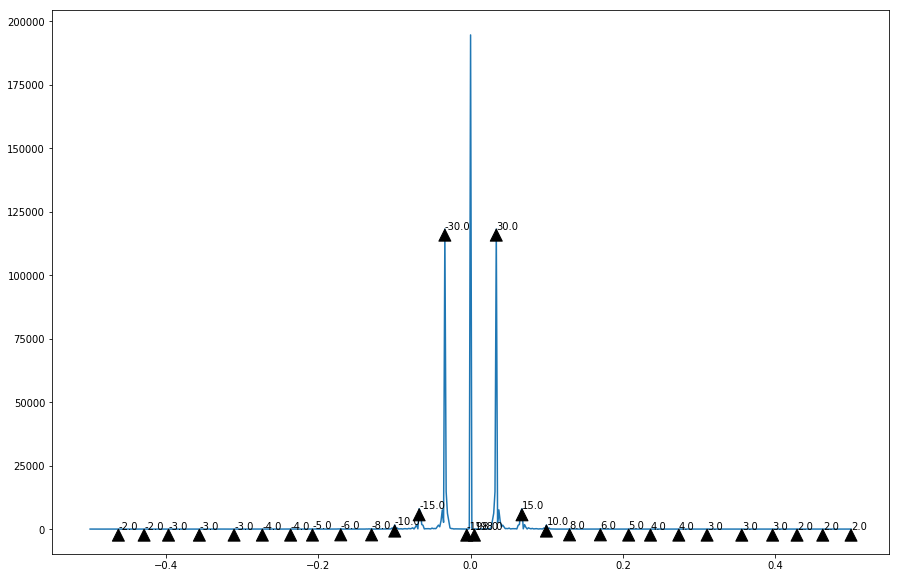

In [16]:
import numpy as np
import peakutils

# Sample spacing (inverse of sampling rate)
# Assumed constant spacing.
# 1 means we don't know what the space is.
# If spacing between sample points y is in seconds, the sample_spacing is the inverse of sampling rate.
sample_spacing = 1  

# calculate power spectrum
spectra = np.abs(np.fft.fft(y))**2

# get frequency bins of the power spectrum, each frequency is measured in cycles per unit of the sample spacing,
# if sample_spacing=1, the frequency is in cycles per point, in other words, it is the reverse of point count per cycle
freqs = np.fft.fftfreq(len(y), sample_spacing)
idx = np.argsort(freqs)

fig = plt.figure()
ax = fig.add_subplot(111)

peakIdx = peakutils.indexes(spectra, thres=0.02/max(spectra), min_dist=15)

for peakId in peakIdx:
    ax.annotate( round(1/freqs[peakId]), xy=(freqs[peakId], spectra[peakId]), xytext=(freqs[peakId], spectra[peakId]),
        arrowprops=dict(facecolor='black', shrink=0.05)
    )

plt.plot(freqs[idx], spectra[idx])
